# Author : Abdul Aves 

## GRIPMAY22 @ The Sparks Foundation - Data Science and Business Analytics Internship 

## Task- 1: Prediction Using Supervised Machine Learning

### Simple Linear Regression

* The problem is to predict the percentage of a student based on the number of study hours and we have to calculate the predicted score if a student studies for 9.25 hrs/day.

### Importing Libraries

* NumPY and Pandas are used for Data Manipulation
* Matplotlib & Seaborn is used for Data Visualization

### Step- 1: Reading and Understanding the Data

In [3]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Reading the data from the given "URL"
Url ="http://bit.ly/w-data"
data = pd.read_csv(Url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
# Inspect the various aspects of our dataframe
data.shape

(25, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Step- 2: Exploratory Data Analysis

In [9]:
# surpress warnings
import warnings
warnings.filterwarnings("ignore")

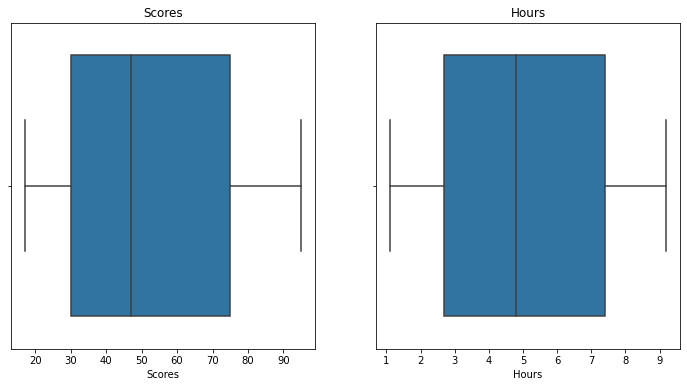

In [10]:
# To check for the outliers
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1, title ="Scores")
ax2 = fig.add_subplot(1,2,2, title ="Hours")
sns.boxplot(data.Scores, ax = ax1)
sns.boxplot(data. Hours, ax = ax2)
plt.show()

No outlier found to be treated henceforth.

#### Data visualization

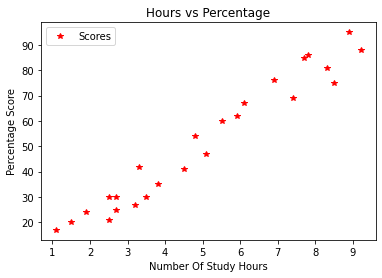

In [11]:
# Plotting the distribution of scores
data.plot(x = "Hours",y="Scores",style='*',color="red")
plt.title("Hours vs Percentage")
plt.xlabel("Number Of Study Hours")
plt.ylabel("Percentage Score")
plt.show()

From the above graph,we can say that there is a positive linear relation between the number of study hours and percentage score.

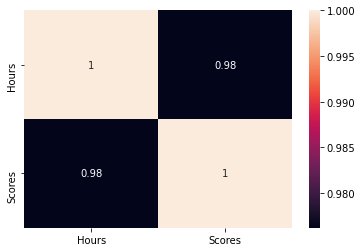

In [13]:
# To check for correlation
sns.heatmap(data.corr(), annot= True)
plt.show()

Hours and Scores are highly positively correlated to each other.

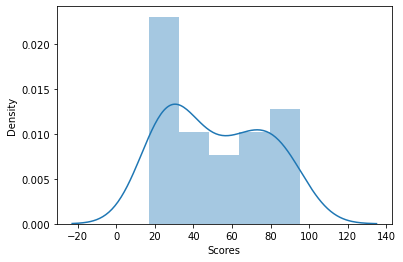

In [14]:
# To check for the didtribution of scores in the dataset
sns.distplot(data['Scores'], bins=5)
plt.show()

Almost normally distributed with the skew in postive side. Hence we can perform LINEAR REGRESSION to predict the values

## Step- 3: Performing Simple Linear Regression

### Generic steps in model building 

#### Preparing the Data

* First assign the feature variable, Hours to the variable X and the response variable, Score, to the variable y.
* To divide the data into "attributes" (inputs) and "labels" (outputs).

In [15]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

#### Train-Test Split
   - To split our variable into training and testing sets.
   - Will perform this by importing train_test_split from the sklearn.model_selection library. 
   - It is usually a good practice to keep 80% of the data in your train dataset and the rest 20% in your test dataset.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
#Now let's take a look at train and test datasets individually

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20, 1)
(20,)
(5, 1)
(5,)


In [18]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [21]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [22]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [23]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

#### After splitting the data into training and testing sets,finally it's the time to train our algorithm.

### Step- 4: Training the Linear Regression Model

In [25]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
print("Training Complete")

Training Complete


### Plotting the regression line

Since our model is trained now, its the time to visualize the best-fit line of regression.

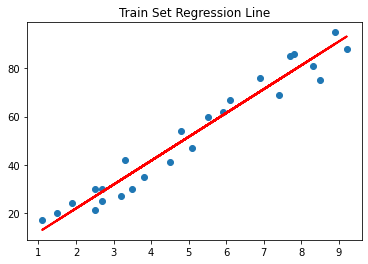

In [26]:
#plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.title('Train Set Regression Line')
plt.scatter(X, y,)
plt.plot(X, line,color='red',linewidth=2);
plt.show()

### Checking Accuracy Scores for both training as well as testing sets

In [28]:
print("Training Score:",regressor.score(X_train,y_train)*100)
print("Testing Score:",regressor.score(X_test,y_test)*100)

Training Score: 95.15510725211553
Testing Score: 94.54906892105356


### Step 5: Predictions on the Test Set

* Now that we have fitted a regression line on our train dataset, it's time to make some predictions on the test data. For this, we first need to add a constant to the X_test data like we did for X_train and then we can simply go on and predict the y values corresponding to X_test using the predict attribute of the fitted regression line.

In [29]:
print(X_test) #Testing data in hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Comparing Actual vs Predicted Model

In [30]:
y_pred = regressor.predict(X_test)
predictions = pd.DataFrame({'Hours':X_test.flatten(), 'Actual_Score': y_test, 'Predicted_Score': y_pred})  
predictions

,Hours,Actual_Score,Predicted_Score
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


In [31]:
# Estimating the Training and Test Score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105356


### Difference in Actual and Predicted value using Bar plot

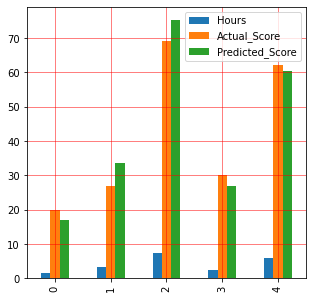

In [37]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

predictions.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

In [38]:
# You can also test with your own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


## Step- 6: Evaluating the model

-  The final step is to evaluate the performance of algorithm. This step is quite important to compare how well different algorithms perform on a particular dataset. we have chosen the mean square error. Also, there are many such metrics which we can choose.

In [39]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356


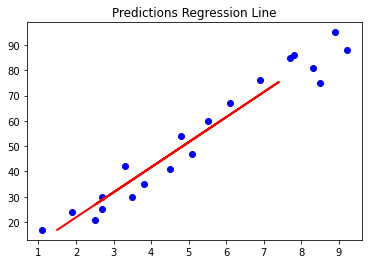

In [40]:
plt.title("Predictions Regression Line")
plt.scatter(X_train, y_train, color = "blue")
plt.plot(X_test, y_pred, color = "red", linewidth = 2)
plt.show()

## Final Conclusion

In [41]:
value = np.array(9.25)
pred = regressor.predict(value.reshape(-1, 1))
print(f"If you spend {value} hrs/day, then you will get your score  = {pred[0]}")

If you spend 9.25 hrs/day, then you will get your score  = 93.69173248737538
